In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

In [2]:
np.random.seed(0)

***
Otwieranie danych
***

In [3]:
with open('german-traffic-signs/train.p','rb') as file:
  train_data = pickle.load(file)
with open('german-traffic-signs/valid.p','rb') as file:
  valid_data = pickle.load(file)
with open('german-traffic-signs/test.p','rb') as file:
  test_data = pickle.load(file)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [5]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

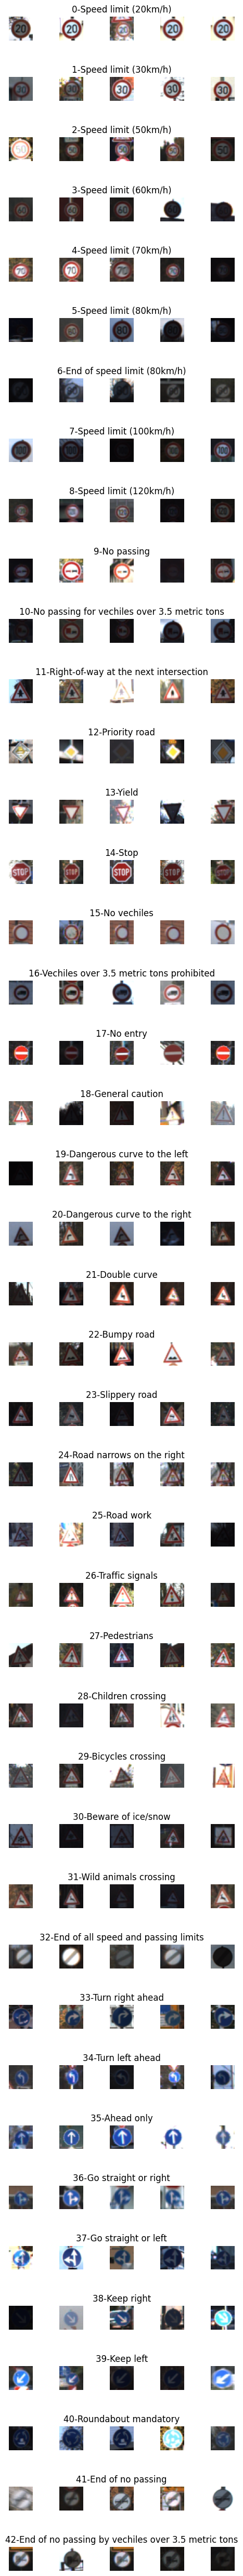

In [6]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + "-"+ row['SignName'])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


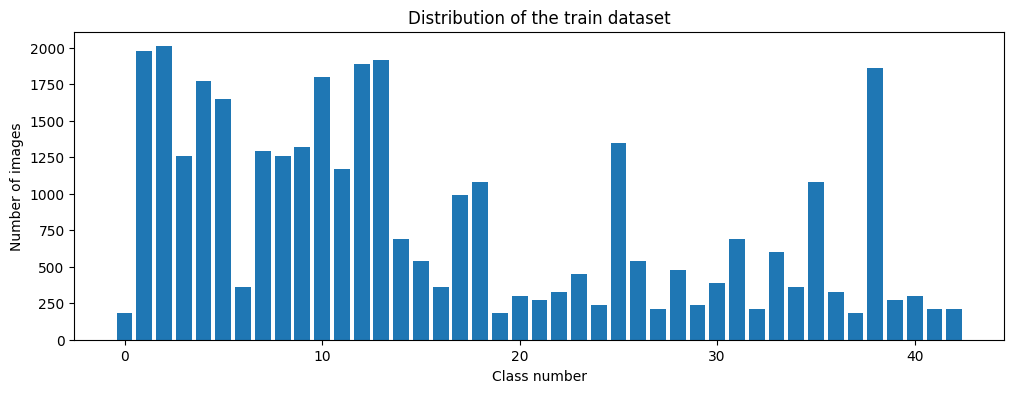

In [7]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


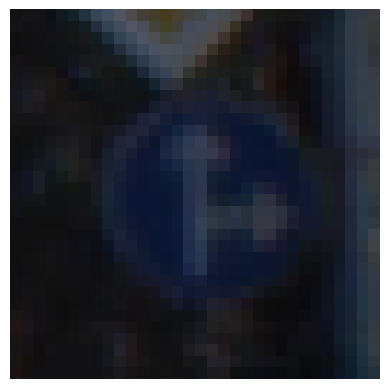

In [8]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

***
Image Preprocesing
***

(32, 32)


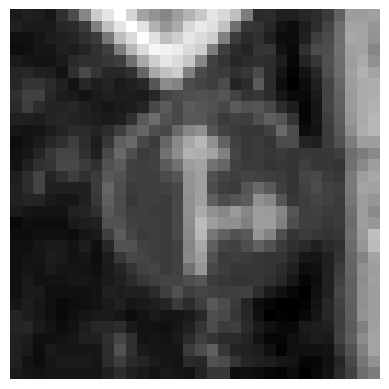

In [9]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img, cmap='gray')
plt.axis('off')
print(img.shape)

(32, 32)


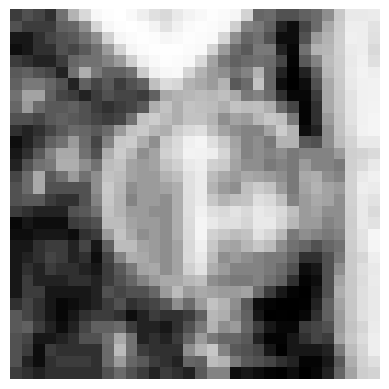

In [10]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img, cmap='gray')
plt.axis('off')
print(img.shape)

In [11]:
def preprocesing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocesing, X_train)))
X_val = np.array(list(map(preprocesing, X_val)))
X_test = np.array(list(map(preprocesing, X_test)))

(34799, 32, 32)


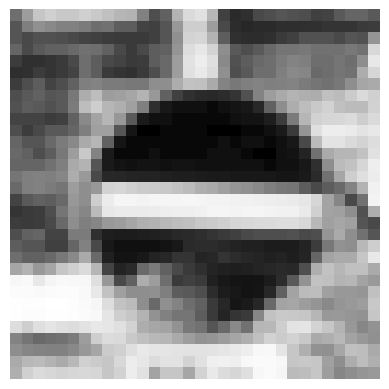

In [12]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)], cmap='gray')
plt.axis('off')
print(X_train.shape)

In [13]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [15]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

***
leNet Implementation
***

In [16]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30,(5,5), input_shape = (32,32,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [18]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 540)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Epoch 1/10
87/87 [==============================] - 16s 172ms/step - loss: 2.0611 - accuracy: 0.4189 - val_loss: 0.9346 - val_accuracy: 0.7236
Epoch 2/10
87/87 [==============================] - 14s 166ms/step - loss: 0.7300 - accuracy: 0.7688 - val_loss: 0.5819 - val_accuracy: 0.8209
Epoch 3/10
87/87 [==============================] - 14s 165ms/step - loss: 0.5005 - accuracy: 0.8410 - val_loss: 0.4946 - val_accuracy: 0.8533
Epoch 4/10
87/87 [==============================] - 14s 166ms/step - loss: 0.4219 - accuracy: 0.8648 - val_loss: 0.5042 - val_accuracy: 0.8440
Epoch 5/10
87/87 [==============================] - 15s 168ms/step - loss: 0.3802 - accuracy: 0.8774 - val_loss: 0.5152 - val_accuracy: 0.8444
Epoch 6/10
87/87 [==============================] - 14s 159ms/step - loss: 0.3209 - accuracy: 0.8966 - val_loss: 0.4728 - val_accuracy: 0.8673
Epoch 7/10
87/87 [==============================] - 15s 168ms/step - loss: 0.2914 - accuracy: 0.9063 - val_loss: 0.4432 - val_accuracy: 0.8744

In [20]:
print(X_train.shape)

(34799, 32, 32, 1)
